# 朴素贝叶斯分类器
朴素贝叶斯分类器的模型可以表示为： 

假设有类别 $C_i$（$i = 1, 2, ..., n$），对于一个待分类的样本 $x$，朴素贝叶斯分类器的任务就是求出后验概率 $P(C_i|x)$，然后选择后验概率最大的类别作为样本的分类结果。 

朴素贝叶斯分类器的核心就是基于贝叶斯定理： 

$$P(C_i|x) = \frac{P(x|C_i)P(C_i)}{P(x)}$$ 

其中，$P(C_i)$ 表示类别 $C_i$ 在所有训练样本中出现的概率，也称为先验概率；$P(x|C_i)$ 表示在类别 $C_i$ 的前提下，样本 $x$ 出现的概率，也称为类条件概率(似然)；$P(x)$ 是样本 $x$ 出现的概率，也称为证据因子。 

朴素贝叶斯分类器的“朴素”就在于它对样本的特征做了一些简化假设，即假设所有的特征都是独立的，互不影响。因此，将条件概率 $P(x|C_i)$ 展开，可以得到： 

$$P(x|C_i) = P(x_1, x_2, ..., x_n|C_i)$$ 

$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = P(x_1|C_i)P(x_2|C_i)...P(x_n|C_i)$$ 

根据这个假设，可以将待分类的样本 $x$ 表示为 $x = [x_1, x_2, ..., x_n]$，其中 $x_i$ 表示样本的第 $i$ 个特征。 

因此，朴素贝叶斯分类器的模型可以表示为： 

$$P(C_i|x) = \frac{P(x_1|C_i)P(x_2|C_i)...P(x_n|C_i)P(C_i)}{P(x)}$$ 

其中，$P(x_i|C_i)$ 表示在类别 $C_i$ 的前提下，样本的第 $i$ 个特征取值为 $x_i$ 的概率。通常情况下，$P(x_i|C_i)$ 采用高斯分布、多项式分布或伯努利分布等概率模型进行建模。 

最后，分类器会选择后验概率最大的类别 $C_i$ 作为样本的分类结果： 

$$y = arg\max_{C_i} P(C_i|x)$$

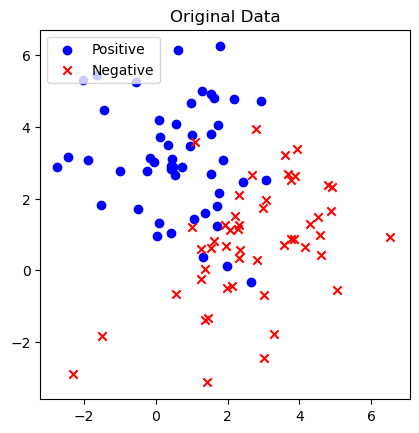

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(2)
m = 100  # 样本数
# 第一组数据
mean_1 = (1, 3)
cov_1 = [[2, 0], [0, 2]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, m//2).T
# 第二组数据
mean_2 = (3, 1)
cov_2 = [[2, 0.5], [0.5, 2]]
X_2 = np.random.multivariate_normal(mean_2, cov_2, m//2).T

# 显示数据
plt.scatter(X_1[0,:], X_1[1,:], color='blue', marker='o', label='Positive')
plt.scatter(X_2[0,:], X_2[1,:], color='red', marker='x', label='Negative')
plt.axis('square')
plt.legend(loc='upper left')
plt.title('Original Data')
plt.show()

X = np.concatenate((X_1, X_2), axis=1)
Y = np.concatenate((np.ones(m//2), np.zeros(m//2)))

先验概率 $P(C_i)$ 表达了样本中各类样本所占的比例，根据大数定律，
当训练集包含充足的独立同分布样本时 $P(C_i)$ 可通过各类样本出现的频率来进行估计.
## 极大似然估计
估计类条件概率的一种常用策略是先假定其具有某种确定的概率分布形式，再基于训练样本对概率分布的参数进行估计.
假设上述样本服从高斯分布，(事实也是如此) <br>
参数估计为：<br>
$$\hat{\boldsymbol{\mu}}_{c}=\frac{1}{\left|D_{c}\right|} \sum_{\boldsymbol{x} \in D_{c}} \boldsymbol{x}$$
$$\hat{\boldsymbol{\sigma}}_{c}^{2}=\frac{1}{\left|D_{c}\right|} \sum_{\boldsymbol{x} \in D_{c}}\left(\boldsymbol{x}-\hat{\boldsymbol{\mu}}_{c}\right)\left(\boldsymbol{x}-\hat{\boldsymbol{\mu}}_{c}\right)^{\mathrm{T}}$$

## 参考文献
[1] 南瓜书PumpkinBook <br>
[2] 《机器学习》（西瓜书）<br>

In [41]:
em_mu1 = np.mean(X_1, axis=1)[:, np.newaxis]
em_mu2 = np.mean(X_2, axis=1)[:, np.newaxis]
em_cov1 = 1 / (m // 2) * (X_1 - em_mu1) @ (X_1 - em_mu1).T
em_cov2 = 1 / (m // 2) * (X_2 - em_mu2) @ (X_2 - em_mu2).T

假设概率密度函数$p(\boldsymbol{x} | c) \sim \mathcal{N}\left(\boldsymbol{\mu}_{c}, \boldsymbol{\sigma}_{c}^{2}\right)$，其等价于假设
$$P\left(\boldsymbol{x} | \boldsymbol{\theta}_{c}\right)=P\left(\boldsymbol{x} | \boldsymbol{\mu}_{c}, \boldsymbol{\sigma}_{c}^{2}\right)=\frac{1}{\sqrt{(2 \pi)^{d}|\boldsymbol{\Sigma}_c|}} \exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_c)^{\mathrm{T}} \boldsymbol{\Sigma}_c^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_c)\right)$$
不采用上述联合概率分布，假设其所有特征相互独立（事实上不独立）
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

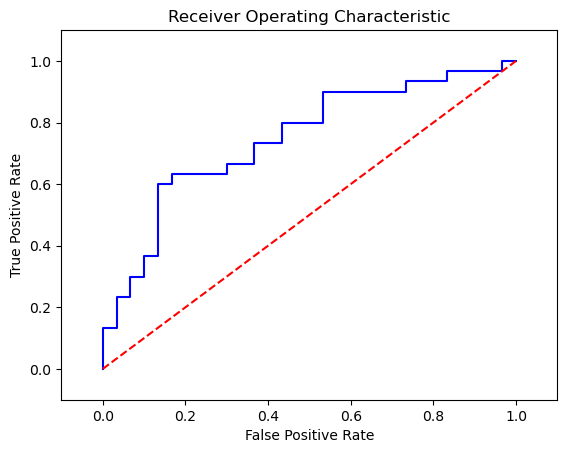

In [153]:
em_mu11 = np.mean(X_1[0,:])
em_mu12 = np.mean(X_1[1,:])
em_var11 = np.var(X_1[0,:])
em_var12 = np.var(X_1[1,:])
em_mu21 = np.mean(X_2[0,:])
em_mu22 = np.mean(X_2[1,:])
em_var21 = np.var(X_2[0,:])
em_var22 = np.var(X_2[1,:])

def gaussian_likelihood(x, var1, mu1, var2, mu2):
    p1 = 1 / np.sqrt(2 * np.pi * var1) * np.exp(-(x[0] - mu1)**2 / (2 * var1))
    p2 = 1 / np.sqrt(2 * np.pi * var2) * np.exp(-(x[1] - mu2)**2 / (2 * var2))
    return p1 * p2

def posterior_p(likelihood, priori_p):
    return likelihood * priori_p

priori_p1 = 0.5
priori_p2 = 0.5

# 测试集
np.random.seed(6)
m = 60  # 样本数
# 第一组数据
mean_1 = (1.5, 2.5)
cov_1 = [[2, 0], [0, 2]]
Xtest_1 = np.random.multivariate_normal(mean_1, cov_1, m//2).T
# 第二组数据
mean_2 = (2.5, 1.5)
cov_2 = [[2, 0.5], [0.5, 2]]
Xtest_2 = np.random.multivariate_normal(mean_2, cov_2, m//2).T

Xtest = np.concatenate((Xtest_1, Xtest_2), axis=1)
Ytest = np.concatenate((np.ones(m//2), np.zeros(m//2)))

posterior_p1 = []
posterior_p2 = []
for i in range(m):
    posterior_p1.append(posterior_p(gaussian_likelihood(Xtest[:,i], em_var11, em_mu11, em_var12, em_mu12), priori_p1))
    posterior_p2.append(posterior_p(gaussian_likelihood(Xtest[:,i], em_var21, em_mu21, em_var22, em_mu22), priori_p2))

D_val = np.array(posterior_p1) - np.array(posterior_p2)
m_pos = m // 2
m_neg = m // 2
D_index = np.argsort(D_val)[::-1]
D_val = D_val[D_index]
Ytest = Ytest[D_index]

plotx = [0]  # 假正例率
ploty = [0]  # 真正例率
for i in range(m):
    if Ytest[i] == 1:
        ploty.append(ploty[-1] + 1 / m_pos)
        plotx.append(plotx[-1])
    else:
        ploty.append(ploty[-1])
        plotx.append(plotx[-1] + 1 / m_neg)

plt.plot(plotx, ploty, 'b')
plt.title('Receiver Operating Characteristic')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()